<a href="https://colab.research.google.com/github/FanchonSora/TMC-Lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Gaussian Elimination
Objective: Implement Gaussian Elimination to solve a system of linear equations.

**Task: Write a program to solve the following system using Gaussian Elimination:**

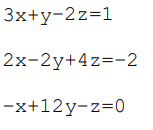

In [73]:
def gaussian_elimination(A):
    n = len(A)
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            for r in range(i+1, n):
                if A[r][i] != 0:
                    A[i], A[r] = A[r], A[i]
                    pivot = A[i][i]
                    break
        for j in range(i+1, n):
            if A[j][i] != 0:
                factor = A[j][i] / A[i][i]
                for k in range(i, n+1):
                    A[j][k] -= factor * A[i][k]
    x = [0] * n
    for i in range(n-1, -1, -1):
        s = 0
        for j in range(i+1, n):
            s += A[i][j] * x[j]
        x[i] = (A[i][n] - s) / A[i][i]
    return x

In [75]:
if __name__ == "__main__":
    A = [
        [  3,   1,  -2,   1 ],
        [  2,  -2,   4,  -2 ],
        [ -1,  12,  -1,   0 ]
    ]
    solution = gaussian_elimination(A)
    print("Solution:")
    print(f"x = {solution[0]}")
    print(f"y = {solution[1]}")
    print(f"z = {solution[2]}")

Solution:
x = 0.0
y = -0.043478260869565244
z = -0.5217391304347826


#Part 2: Iterative Methods (Jacobi and Gauss-Seidel)
Objective: Implement Jacobi and Gauss-Seidel methods to solve linear systems.

**Task: Solve the system of linear equations using both Jacobi and Gauss-Seidel methods**


In [61]:
import numpy as np

def gauss_seidel(A, b, tol = 1e-6, max_iterations = 1000):
    n = len(b)
    x = np.zeros_like(b, dtype = np.float64)
    for iter in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x_new - x, ord = np.inf) < tol:
            return x_new, iter + 1
        x = x_new
    print("Maximum iterations reached, no convergence")
    return x, max_iterations

In [62]:
def jacobi(A, b, tol = 1e-6, max_iterations = 1000):
    n = len(b)
    x = np.zeros_like(b, dtype = np.float64)
    D_inv = np.diag(1 / np.diag(A))
    R = A - np.diag(np.diag(A))
    for iter in range(max_iterations):
        x_new = np.dot(D_inv, (b - np.dot(R, x)))
        if np.linalg.norm(x_new - x, ord = np.inf) < tol:
            return x_new, iter + 1
        x = x_new
    print("Maximum iterations reached, no convergence")
    return x, max_iterations

#Part 3: Comparative Analysis
Objective: Compare the efficiency and accuracy of the methods: Gaussian Elimination, Jacobi, and Gauss-Seidel

**Task: Solve the same system using all three methods. Measure the number of iterations and computational time. Compare results and discuss the advantages and disadvantages of each method.**


In [85]:
import pandas as pd
def compare(A, b):
    aug = np.hstack((A, b.reshape(-1, 1)))
    r = []
    # Gaussian Elimination
    start = time.perf_counter()
    x_ge = gaussian_elimination(aug.copy())
    time_ge = time.perf_counter() - start
    r.append({
        "Method": "Gaussian Elimination",
        "Solution": np.around(x_ge, 6),
        "Iterations": "N/A",
        "Time (s)": time_ge
    })
    # Gauss-Seidel
    start = time.perf_counter()
    x_gs, iter_gs = gauss_seidel(A, b)
    time_gs = time.perf_counter() - start
    r.append({
        "Method": "Gauss-Seidel",
        "Solution": np.around(x_gs, 6),
        "Iterations": iter_gs,
        "Time (s)": time_gs
    })
    # Jacobi
    start = time.perf_counter()
    x_j, iter_j = jacobi(A, b)
    time_j = time.perf_counter() - start
    r.append({
        "Method": "Jacobi",
        "Solution": np.around(x_j, 6),
        "Iterations": iter_j,
        "Time (s)": time_j
    })
    df = pd.DataFrame(r)
    return df

In [83]:
A = np.array([[4, 1, 2],
                  [1, 3, 1],
                  [2, 1, 5]], dtype=np.float64)
b = np.array([4, 5, 6], dtype=np.float64)
compare(A, b)

,Method,Solution,Iterations,Time (s)
0,Gaussian Elimination,"[0.255814, 1.302326, 0.837209]",N/A,0.000075
1,Gauss-Seidel,"[0.255814, 1.302325, 0.837209]",10,0.001620
2,Jacobi,"[0.255814, 1.302326, 0.83721]",37,0.000586


#Part 4: Exercise
**Solve the system Ax=b where**

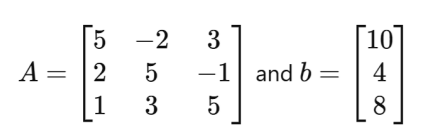

**using the Jacobi and Gauss-Seidel methods. Compare the number of iterations needed to achieve a solution with an accuracy of 10^-6**


In [86]:
def solve(A, b, tol = 1e-6, max_iterations = 1000):
    # GS
    sol_gs, it_gs = gauss_seidel(A, b, tol, max_iterations)
    # J
    sol_jac, it_jac = jacobi(A, b, tol, max_iterations)
    print("Compare Gauss-Seidel and Jacobi")
    print("{:<15} | {:<15} | {:<30}".format("Method", "Iterations", "Solution"))
    print("-" * 70)
    print("{:<15} | {:<15} | {}".format("Gauss-Seidel", it_gs, sol_gs))
    print("{:<15} | {:<15} | {}".format("Jacobi", it_jac, sol_jac))

In [87]:
if __name__ == "__main__":
    A = np.array([
        [ 5., -2.,  3.],
        [ 2.,  5., -1.],
        [ 1.,  3.,  5.]
    ])
    b = np.array([10., 4., 8.])
    solve(A, b, tol = 1e-6, max_iterations = 1000)

Compare Gauss-Seidel and Jacobi
Method          | Iterations      | Solution                      
----------------------------------------------------------------------
Gauss-Seidel    | 12              | [1.52727256 0.40000008 1.05454544]
Jacobi          | 26              | [1.5272723  0.4        1.05454585]
